# Preprocessing for Tutorial for Object detection using Region Proposal Network
by Dufan Wu: dwu6@mgh.harvard.edu
Center for Advanced Medical Computing and Analysis, Massachusetts General Hospital, Boston MA 02114
https://camca.mgh.harvard.edu/

This is a tutorial using region proposal network to detect lung in chest X-ray. The ground truth bounding box is generated from the lung segmentation.<br>
The dataset is from https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels

Data source: National Library of Medicine, National Institutes of Health, Bethesda, MD, USA and Shenzhen No.3 People’s Hospital, Guangdong Medical College, Shenzhen, China<br>
Publications on this data:<br>
[1] Jaeger S, et al. Automatic tuberculosis screening using chest radiographs. IEEE Trans Med Imaging. 2014 Feb;33(2):233-45.<br>
[2] Candemir S, et al. Lung segmentation in chest radiographs using anatomical atlases with nonrigid registration. IEEE Trans Med Imaging. 2014 Feb;33(2):577-90.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import os
import scipy.ndimage
import glob
import imageio
import skimage.measure
import utils

In [6]:
# set this path to your downloaded dataset from https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels
dataset_path = '/raid/temp/Lung Segmentation/'
output_dir = './data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [7]:
filenames = glob.glob(os.path.join(dataset_path, 'CXR_png/*.png'))

imgs = []
bboxes = []
for i, filename in enumerate(filenames):
    if (i+1) % 10 == 0:
        print (i, end=',')
    
    maskname = glob.glob(os.path.join(dataset_path, 'masks', os.path.basename(filename).strip('.png')+'*'))
    if len(maskname) == 0:
        continue
    
    img = imageio.imread(filename)
    if img.ndim > 2:
        img = np.mean(img, -1)
    mask = imageio.imread(maskname[0])
    if mask.ndim > 2:
        mask = np.mean(mask, -1)
    mask = skimage.measure.label(mask, background=0)
    
    if mask.max() != 2:
        continue
    
    # crop image and mask so that they have same width and height
    w = img.shape[0]
    h = img.shape[1]
    if w > h:
        img = img[(w-h)//2:(w-h)//2+h, :]
        mask = mask[(w-h)//2:(w-h)//2+h, :]
    else:
        img = img[:, (h-w)//2:(h-w)//2+w]
        mask = mask[:, (h-w)//2:(h-w)//2+w]
    
    bbox = np.array([r.bbox for r in skimage.measure.regionprops(mask)])
    bbox = bbox[:, [1,0,3,2]]
    bbox[:, 2] = bbox[:, 2] - bbox[:, 0]
    bbox[:, 3] = bbox[:, 3] - bbox[:, 1]
    
    zoom = 256 / img.shape[0]
    bbox = (bbox.astype(np.float32) * zoom).astype(np.float32)
    img = scipy.ndimage.zoom(img, zoom)
    
    imgs.append(img)
    bboxes.append(bbox)

imgs = np.array(imgs)
bboxes = np.array(bboxes)

9,19,29,39,49,59,69,79,89,99,109,119,129,139,149,159,169,179,189,199,209,219,229,239,249,259,269,279,289,299,309,319,329,339,349,359,369,379,389,399,409,419,429,439,449,459,469,479,489,499,509,519,529,539,549,559,569,579,589,599,609,619,629,639,649,659,669,679,689,699,709,719,729,739,749,759,769,779,789,799,

In [10]:
labels = np.ones([bboxes.shape[0]], np.float32)

In [11]:
np.save(os.path.join(output_dir, 'imgs'), imgs)
np.save(os.path.join(output_dir, 'coords'), bboxes)
np.save(os.path.join(output_dir, 'labels'), labels)

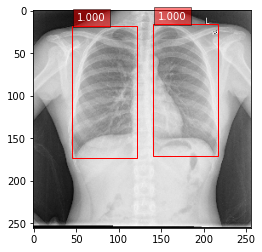

In [15]:
utils.display_with_bbox(imgs[11,...], None, bboxes[11], vmax=None)